In [1]:
import pandas as pd
import numpy as np
import os
import graphlab as gl
import graphlab.aggregate as agg
import math
from graphlab import SFrame
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
%matplotlib inline

In [2]:
import sys
reload(sys)
sys.setdefaultencoding('utf8')

In [3]:
gl.canvas.set_target('ipynb')

In [4]:
df=pd.read_excel('Online Retail.xlsx')
df.dropna(axis=1, how='all')
len(df)

541909

In [5]:
df.info(memory_usage='deep')

In [6]:
df.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

In [7]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [8]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [13]:
df['StockCode']= df['StockCode'].astype(str)
df['Description']= df['Description'].astype(object)
df['CustomerID']= df['CustomerID'].astype(object)
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice CustomerID         Country  
0 2010-12-01 08:26:00       2.55      17850  United Kingdom  
1 2010-12-01 08:26:00       3.39      17850  United Kingdom  
2 2010-12-01 08:26:00       2.75      17850  United Kingdom  
3 2010-12-01 08:26:00       3.39      17850  United Kingdom  
4 2010-12-01 08:26:00       3.39      17850  United Kingdom

In [15]:
stockcode= df['StockCode'].value_counts()
stockcode

85123A      2313
22423       2203
85099B      2159
47566       1727
20725       1639
84879       1502
22720       1477
22197       1476
21212       1385
20727       1350
22383       1348
22457       1280
23203       1267
POST        1256
22386       1251
22469       1239
22960       1229
21931       1214
22086       1210
22411       1202
20728       1197
22382       1192
22961       1182
22666       1180
23298       1179
22699       1138
22384       1137
23209       1135
82482       1129
22993       1111
            ... 
72814          1
90181C         1
21854          1
16169N         1
90162A         1
23643          1
37503          1
84201C         1
90025E         1
90102          1
46776a         1
84482          1
72789          1
21330          1
21337          1
DCGS0057       1
85109          1
21858          1
82615          1
20849          1
35644          1
84526          1
79323G         1
79323S         1
20825          1
17011A         1
82545A         1
85160a        

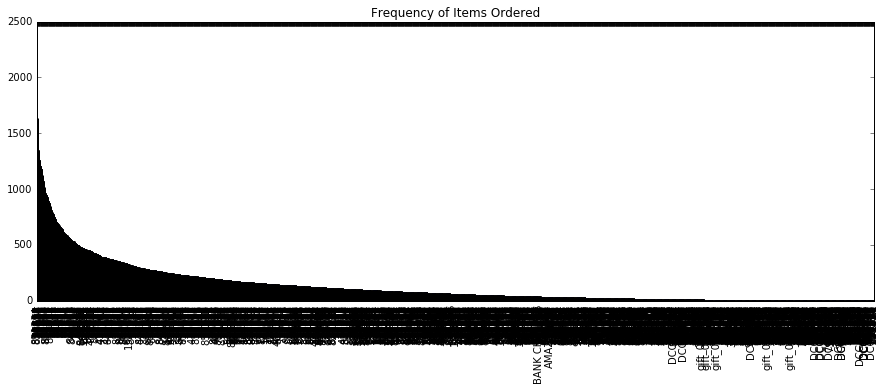

In [25]:
stockcode.plot.bar(figsize=(15,5))
plt.title('Frequency of Items Ordered');

In [26]:
df.drop(["UnitPrice", "InvoiceNo"], axis=1, inplace=True)
df.head()

StockCode                          Description  Quantity  \
0    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     71053                  WHITE METAL LANTERN         6   
2    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate CustomerID         Country  
0 2010-12-01 08:26:00      17850  United Kingdom  
1 2010-12-01 08:26:00      17850  United Kingdom  
2 2010-12-01 08:26:00      17850  United Kingdom  
3 2010-12-01 08:26:00      17850  United Kingdom  
4 2010-12-01 08:26:00      17850  United Kingdom

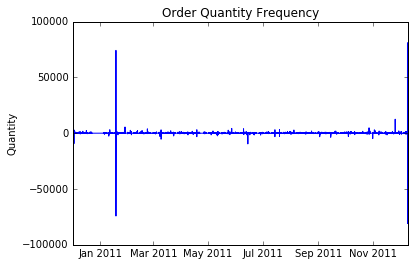

In [27]:
plt.plot(df.InvoiceDate, df.Quantity)
plt.ylabel('Quantity')
plt.title('Order Quantity Frequency')
plt.show()

In [28]:
country=df['Country'].value_counts()
country

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

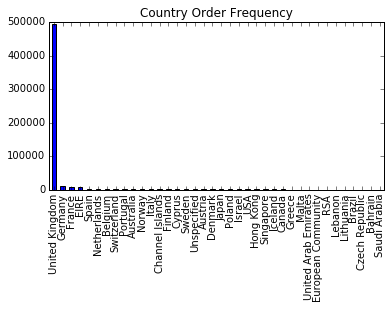

In [29]:
country.plot.bar(figsize=(6,3))
plt.title('Country Order Frequency')
plt.show();

In [30]:
df['Items']= df['StockCode']+' : '+df['Description'].astype(str)
df.drop(["StockCode", "Description", "InvoiceDate", "Country"], axis=1, inplace=True)
df.head()

Quantity CustomerID                                         Items
0         6      17850   85123A : WHITE HANGING HEART T-LIGHT HOLDER
1         6      17850                   71053 : WHITE METAL LANTERN
2         8      17850       84406B : CREAM CUPID HEARTS COAT HANGER
3         6      17850  84029G : KNITTED UNION FLAG HOT WATER BOTTLE
4         6      17850       84029E : RED WOOLLY HOTTIE WHITE HEART.

In [31]:
items=df['Items'].value_counts()
items

85123A : WHITE HANGING HEART T-LIGHT HOLDER           2302
22423 : REGENCY CAKESTAND 3 TIER                      2200
85099B : JUMBO BAG RED RETROSPOT                      2159
47566 : PARTY BUNTING                                 1727
20725 : LUNCH BAG RED RETROSPOT                       1638
84879 : ASSORTED COLOUR BIRD ORNAMENT                 1501
22720 : SET OF 3 CAKE TINS PANTRY DESIGN              1473
21212 : PACK OF 72 RETROSPOT CAKE CASES               1385
20727 : LUNCH BAG  BLACK SKULL.                       1350
22457 : NATURAL SLATE HEART CHALKBOARD                1280
POST : POSTAGE                                        1252
22386 : JUMBO BAG PINK POLKADOT                       1251
22469 : HEART OF WICKER SMALL                         1237
22960 : JAM MAKING SET WITH JARS                      1229
21931 : JUMBO STORAGE BAG SUKI                        1214
22086 : PAPER CHAIN KIT 50'S CHRISTMAS                1210
22411 : JUMBO SHOPPER VINTAGE RED PAISLEY             12

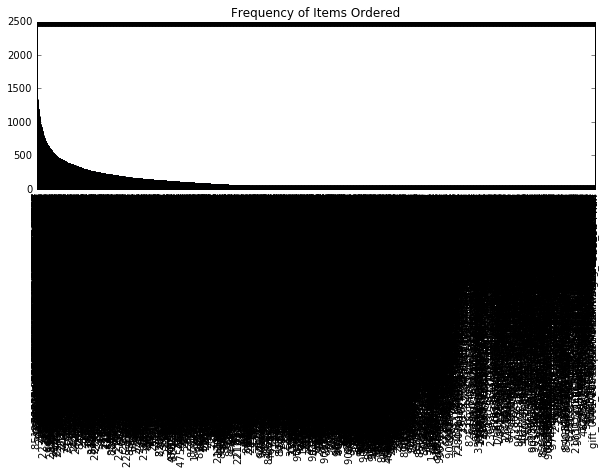

In [32]:
items.plot.bar(figsize=(10,3))
plt.title('Frequency of Items Ordered');

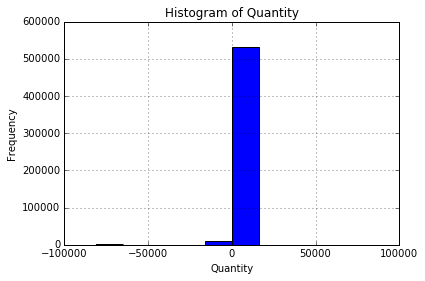

In [33]:
df.Quantity.hist()
plt.title('Histogram of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency');

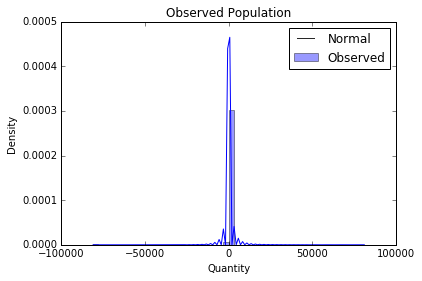

In [34]:
_= sns.distplot(df['Quantity'], kde=True, fit=stats.gamma)
_= plt.xlabel('Quantity')
_= plt.ylabel('Density')
_= plt.title('Observed Population')
_= plt.legend(('Normal', 'Observed'))
plt.show()

In [35]:
df.dtypes

Quantity       int64
CustomerID    object
Items         object
dtype: object

In [36]:
sf=SFrame(data=df)
sf

Columns:
	Quantity	int
	CustomerID	float
	Items	str

Rows: 541909

Data:
+----------+------------+--------------------------------+
| Quantity | CustomerID |             Items              |
+----------+------------+--------------------------------+
|    6     |  17850.0   | 85123A : WHITE HANGING HEA...  |
|    6     |  17850.0   |  71053 : WHITE METAL LANTERN   |
|    8     |  17850.0   | 84406B : CREAM CUPID HEART...  |
|    6     |  17850.0   | 84029G : KNITTED UNION FLA...  |
|    6     |  17850.0   | 84029E : RED WOOLLY HOTTIE...  |
|    2     |  17850.0   | 22752 : SET 7 BABUSHKA NES...  |
|    6     |  17850.0   | 21730 : GLASS STAR FROSTED...  |
|    6     |  17850.0   | 22633 : HAND WARMER UNION JACK |
|    6     |  17850.0   | 22632 : HAND WARMER RED PO...  |
|    32    |  13047.0   | 84879 : ASSORTED COLOUR BI...  |
+----------+------------+--------------------------------+
[541909 rows x 3 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [37]:
sf.dtype()

[int, float, str]

In [38]:
sf['CustomerID']=sf['CustomerID'].astype(int)
sf['Items']=sf['Items'].astype(str)
sf.dropna()
len(sf)

541909

In [39]:
data=sf.groupby(['CustomerID', 'Items'],operations={'totalquantity': agg.SUM('Quantity'), 'meanquantity': agg.AVG('Quantity'), 'stdquantity': agg.STD('Quantity')})
data['meanquantity']=data['meanquantity'].astype(int)
data['stdquantity']=data['stdquantity'].astype(int)
data.show

<bound method SFrame.show of Columns:
	CustomerID	int
	Items	str
	meanquantity	int
	totalquantity	int
	stdquantity	int

Rows: 274339

Data:
+------------+-------------------------------+--------------+---------------+-------------+
| CustomerID |             Items             | meanquantity | totalquantity | stdquantity |
+------------+-------------------------------+--------------+---------------+-------------+
|   17841    | 15060B : FAIRY CAKE DESIGN... |      0       |       8       |      0      |
|   15150    | 85066 : CREAM SWEETHEART M... |      2       |       2       |      0      |
|   18188    | 84997D : CHILDRENS CUTLERY... |      4       |       4       |      0      |
|   14410    | 22431 : WATERING CAN BLUE ... |      1       |       3       |      0      |
|   15022    | 21619 : 4 VANILLA BOTANICA... |      4       |       4       |      0      |
|   16674    | 22974 : CHILDRENS DOLLY GI... |      4       |       4       |      0      |
|   13317    |  22629 : SPACEBOY

In [40]:
data['zquantity']= ((data['totalquantity']-data['meanquantity']) / data['stdquantity'])
data['zquantity']=data['zquantity'].astype(int)
data

Columns:
	CustomerID	int
	Items	str
	meanquantity	int
	totalquantity	int
	stdquantity	int
	zquantity	int

Rows: 274339

Data:
+------------+-------------------------------+--------------+---------------+-------------+
| CustomerID |             Items             | meanquantity | totalquantity | stdquantity |
+------------+-------------------------------+--------------+---------------+-------------+
|   17841    | 15060B : FAIRY CAKE DESIGN... |      0       |       8       |      0      |
|   15150    | 85066 : CREAM SWEETHEART M... |      2       |       2       |      0      |
|   18188    | 84997D : CHILDRENS CUTLERY... |      4       |       4       |      0      |
|   14410    | 22431 : WATERING CAN BLUE ... |      1       |       3       |      0      |
|   15022    | 21619 : 4 VANILLA BOTANICA... |      4       |       4       |      0      |
|   16674    | 22974 : CHILDRENS DOLLY GI... |      4       |       4       |      0      |
|   13317    |  22629 : SPACEBOY LUNCH BOX   |      12      |       12      |      0      |
|   16242    |  48187 : DOORMAT NEW ENGLAND  |      1       |       3       |      0      |
|   15673    | 22956 : 36 FOIL HEART CAKE... |      8       |       8       |      0      |
|   12840    | 37342 : POLKADOT COFFEE CU... |      24      |       24      |      0      |
+------------+-------------------------------+--------------+---------------+-------------+
+----------------------+
|      zquantity       |
+----------------------+
| -9223372036854775808 |
| -9223372036854775808 |
| -9223372036854775808 |
| -9223372036854775808 |
| -9223372036854775808 |
| -9223372036854775808 |
| -9223372036854775808 |
| -9223372036854775808 |
| -9223372036854775808 |
| -9223372036854775808 |
+----------------------+
[274339 rows x 6 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [41]:
data['CustomerID'].unique()

dtype: int
Rows: 4373
[14515L, 14406L, 17338L, 15615L, 17325L, 16284L, 17898L, 13132L, 16261L, 16619L, 15663L, 16370L, 15910L, 17035L, 16249L, 17169L, 13242L, 16139L, 12702L, 18280L, 15068L, 16477L, 16727L, 17696L, 15291L, 16009L, 16187L, 14813L, 16309L, 12515L, 15111L, 14775L, 15005L, 15225L, 15443L, 16399L, 16601L, 12481L, 15175L, 12809L, 15465L, 13581L, 16558L, 17443L, 16523L, 16513L, 12875L, 18218L, 12812L, 16114L, 13421L, 14665L, 12657L, 16648L, 16172L, 13044L, 15668L, 17201L, 13862L, 17584L, 15433L, 17371L, 17984L, 13631L, 17856L, 18212L, 14759L, 14262L, 14107L, 14046L, 12449L, 15152L, 17253L, 12355L, 15917L, 13929L, 16411L, 16473L, 12516L, 17525L, 14208L, 17735L, 14472L, 18167L, 16358L, 17049L, 18169L, 16306L, 16450L, 14666L, 17837L, 14850L, 13373L, 15241L, 17457L, 15023L, 12402L, 14861L, 14125L, 13262L, ... ]

In [42]:
data['Items'].unique()

dtype: str
Rows: 5752
['21245 : GREEN POLKADOT PLATE ', '84228 : crushed', '37450 : CERAMIC CAKE BOWL + HANGING CAKES', '22416 : SET OF 36 SPACEBOY PAPER DOILIES', '21658 : nan', '85089 : CANDY SPOT BUNNY', '82483 : WOOD 2 DRAWER CABINET WHITE FINISH', '23530 : WALL ART ONLY ONE PERSON ', '20849 : nan', '23475 : WOODLAND SMALL PINK FELT HEART', '90164B : nan', '37461 : nan', '90026A : GLASS BEAD HOOP NECKLACE BLACK', '72802c : VANILLA SCENT CANDLE JEWELLED BOX', '22135 : LADLE LOVE HEART PINK', '20903 : nan', '85098B : BLUE FLYING SINGING CANARY', '16049 : TEATIME GEL PENS ASST', '90081C : LILY BROOCH OLIVE COLOUR', '23263 : SET OF 3 WOODEN HEART DECORATIONS', '23388 : WOODLAND MINI BACKPACK', '79192A : nan', '84970L : SINGLE HEART ZINC T-LIGHT HOLDER', '84804A : wet damaged', '21758 : VINTAGE SHELLS PRINT', '23691 : WRAP KEEP CALM BIRTHDAY', '23294 : SET OF 6 SNACK LOAF BAKING CASES', '21109 : LARGE CAKE TOWEL, CHOCOLATE SPOTS', '22959 : WRAP CHRISTMAS VILLAGE', '72807a : SET/3 ROSE C

In [43]:
data['CustomerID'].show()

In [44]:
data['Items'].show()

In [45]:
users= data['CustomerID'].unique()
users.show()
items= data['Items'].unique()
items.show()

In [46]:
data['CustomerID','Items'].show()

In [47]:
m=gl.recommender.create(data, user_id='CustomerID', item_id='Items', target='totalquantity')
m.show()

Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 274339 observations with 4373 users and 5752 items.

Data prepared in: 0.395686s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-009   |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-009   |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 34292 / 274339 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 10                | Not Viable                               |

| 1       | 2.5               | No Decrease (22408.3 >= 18899.9)         |

| 2       | 0.625             | No Decrease (23984.1 >= 18899.9)         |

| 3       | 0.15625           | 16842.7                                  |

| 4       | 0.078125          | No Decrease (23375.6 >= 18899.9)         |

| 5       | 0.0195312         | 17872.6                                  |

| 6       | 0.00976562        | 18441.6                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.15625           | 16842.7                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 0us          | 25916.2           | 114.977               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 394.551ms    | 20273.8           | 89.0399               | 0.15625     |

| 2       | 793.111ms    | 20181             | 83.4385               | 0.15625     |

| 3       | 1.22s        | 20486.4           | 84.4324               | 0.15625     |

| 4       | 1.55s        | 19951.7           | 82.6117               | 0.15625     |

| 5       | 2.04s        | 18620.9           | 78.5977               | 0.15625     |

| 6       | 2.48s        | 19194.9           | 79.6475               | 0.15625     |

| 10      | 4.15s        | 18292.2           | 77.9072               | 0.15625     |

| 11      | 4.48s        | 18402.1           | 78.0736               | 0.15625     |

| 15      | 6.12s        | 19328.2           | 84.9367               | 0.15625     |

| 20      | 7.92s        | 20124.4           | 91.0904               | 0.15625     |

| 25      | 9.93s        | 20672.2           | 97.1863               | 0.15625     |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 21668

Final training RMSE: 100.74

In [48]:
m.evaluate_rmse(dataset=data, target='totalquantity')

{'rmse_by_item': Columns:
 	Items	str
 	count	int
 	rmse	float
 
 Rows: 5752
 
 Data:
 +-------------------------------+-------+---------------+
 |             Items             | count |      rmse     |
 +-------------------------------+-------+---------------+
 | 21245 : GREEN POLKADOT PLATE  |   73  | 30.0588251798 |
 |        84228 : crushed        |   1   | 35.5790003687 |
 | 37450 : CERAMIC CAKE BOWL ... |   48  | 24.6653143861 |
 | 22416 : SET OF 36 SPACEBOY... |   9   | 15.8327138693 |
 |          21658 : nan          |   1   | 173.873003178 |
 |    85089 : CANDY SPOT BUNNY   |   5   | 20.0397227008 |
 | 82483 : WOOD 2 DRAWER CABI... |  244  | 21.0701419305 |
 | 23530 : WALL ART ONLY ONE ... |   60  | 45.6847435969 |
 |          20849 : nan          |   1   | 32.6808564674 |
 | 23475 : WOODLAND SMALL PIN... |   26  | 18.6483659309 |
 +-------------------------------+-------+---------------+
 [5752 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 You can use pri

In [49]:
recs=m.recommend(users,k=20)

recommendations finished on 1000/4373 queries. users per second: 6518.69

recommendations finished on 2000/4373 queries. users per second: 6455.34

recommendations finished on 3000/4373 queries. users per second: 6504.43

recommendations finished on 4000/4373 queries. users per second: 6476.25

In [50]:
train, test = gl.recommender.util.random_split_by_user(data,
                                                             user_id='CustomerID',
                                                             item_id='Items')

In [51]:
factorization = gl.recommender.factorization_recommender.create(train,user_id='CustomerID',item_id='Items',target='totalquantity',solver='als')

rfactorization= gl.recommender.ranking_factorization_recommender.create(train,target='totalquantity',user_id='CustomerID',item_id='Items')

popularity=gl.recommender.popularity_recommender.create(train,user_id='CustomerID',item_id='Items',target='totalquantity')

itemsimilarity=gl.recommender.item_similarity_recommender.create(train,user_id='CustomerID',item_id='Items',target='totalquantity',similarity_type='pearson')

Recsys training: model = factorization_recommender

Preparing data set.

Data has 262245 observations with 4369 users and 5744 items.

Data prepared in: 0.366977s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 8        |

| regularization               | L2 Regularization on Factors                     | 1e-008   |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 0us          | NA                     |

+---------+--------------+------------------------+

| 0       | 149.396ms    | 40.2793                |

| 1       | 262.699ms    | 91.9578                |

| 2       | 405.078ms    | 28.963                 |

| 3       | 559.489ms    | 19.638                 |

| 4       | 694.847ms    | 18.3122                |

| 5       | 822.187ms    | 17.6744                |

| 6       | 927.467ms    | 17.2568                |

| 7       | 1.05s        | 17.7985                |

| 8       | 1.20s        | 16.7433                |

| 9       | 1.34s        | 17.5105                |

| 10      | 1.44s        | 16.3559                |

| 11      | 1.56s        | 16.2069                |

| 12      | 1.67s        | 16.073                 |

| 13      | 1.77s        | 15.9591                |

| 14      | 1.88s        | 15.8514                |

| 15      | 1.99s        | 15.7826                |

| 16      | 2.11s        | 15.6775                |

| 17      | 2.23s        | 15.6123                |

| 18      | 2.36s        | 15.558                 |

| 19      | 2.49s        | 15.473                 |

| 20      | 2.61s        | 15.4147                |

| 21      | 2.72s        | 15.3598                |

| 22      | 2.82s        | 15.3259                |

| 23      | 2.92s        | 15.2598                |

| 24      | 3.01s        | 15.2191                |

| 25      | 3.10s        | 15.164                 |

| 26      | 3.21s        | 15.125                 |

| 27      | 3.32s        | 15.1147                |

| 28      | 3.42s        | 15.0544                |

| 29      | 3.53s        | 15.0902                |

| 30      | 3.63s        | 14.9871                |

| 31      | 3.74s        | 14.9657                |

| 32      | 3.84s        | 14.9653                |

| 33      | 3.94s        | 14.901                 |

| 34      | 4.04s        | 18.5653                |

| 35      | 4.15s        | 16.7795                |

| 36      | 4.25s        | 15.1435                |

| 37      | 4.35s        | 27.4514                |

| 38      | 4.47s        | 21.162                 |

| 39      | 4.59s        | 15.0324                |

| 40      | 4.68s        | 14.8286                |

| 41      | 4.79s        | 14.775                 |

| 42      | 4.90s        | 14.7234                |

| 43      | 5.01s        | 14.6867                |

| 44      | 5.11s        | 26.389                 |

| 45      | 5.21s        | 73.6208                |

| 46      | 5.31s        | 39.373                 |

| 47      | 5.41s        | 30.2847                |

| 48      | 5.50s        | 23.1247                |

| 49      | 5.62s        | 20.6139                |

| FINAL   | 5.62s        | 20.6139                |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 262245 observations with 4369 users and 5744 items.

Data prepared in: 0.372991s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-009   |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-009   |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 32780 / 262245 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 10                | Not Viable                               |

| 1       | 2.5               | No Decrease (57605.6 >= 20553.9)         |

| 2       | 0.625             | No Decrease (22143.3 >= 20553.9)         |

| 3       | 0.15625           | 17756.2                                  |

| 4       | 0.078125          | No Decrease (57677.5 >= 20553.9)         |

| 5       | 0.0195312         | 19002.7                                  |

| 6       | 0.00976562        | 19794.6                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.15625           | 17756.2                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 0us          | 25972.6           | 115.103               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 399.062ms    | 22772             | 104.831               | 0.15625     |

| 2       | 777.067ms    | 27004.4           | 118.064               | 0.15625     |

| 3       | 1.20s        | 29190.9           | 115.119               | 0.15625     |

| 4       | 1.60s        | 35829.1           | 129.88                | 0.15625     |

| 5       | 1.97s        | 28845             | 108.561               | 0.15625     |

| 6       | 2.39s        | 26962.7           | 104.202               | 0.15625     |

| 10      | 3.93s        | 21883             | 82.4226               | 0.15625     |

| 11      | 4.25s        | 21851.1           | 81.3098               | 0.15625     |

| 15      | 5.56s        | 22267.1           | 80.8607               | 0.15625     |

| 20      | 7.17s        | 21046.2           | 79.3311               | 0.15625     |

| 25      | 8.78s        | 20943.2           | 77.9302               | 0.15625     |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 20279.1

Final training RMSE: 79.2695

Recsys training: model = popularity

Warning: Ignoring columns meanquantity, stdquantity, zquantity;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 262245 observations with 4369 users and 5744 items.

Data prepared in: 0.160455s

262245 observations to process; with 5744 unique items.

Recsys training: model = item_similarity

Warning: Ignoring columns meanquantity, stdquantity, zquantity;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 262245 observations with 4369 users and 5744 items.

Data prepared in: 0.17246s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 3.007ms                        | 45.75      |

| 5.013ms                        | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 60.189ms                            | 0                | 1               |

| 1.08s                               | 100              | 5744            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 1.09792s

In [52]:
factorization.evaluate_rmse(dataset=data,target='totalquantity')

{'rmse_by_item': Columns:
 	Items	str
 	count	int
 	rmse	float
 
 Rows: 5752
 
 Data:
 +-------------------------------+-------+-------------------+
 |             Items             | count |        rmse       |
 +-------------------------------+-------+-------------------+
 | 21245 : GREEN POLKADOT PLATE  |   73  |   7.80162760945   |
 |        84228 : crushed        |   1   | 8.80575509399e-07 |
 | 37450 : CERAMIC CAKE BOWL ... |   48  |   6.24124363056   |
 | 22416 : SET OF 36 SPACEBOY... |   9   |   1.27256163579   |
 |          21658 : nan          |   1   | 8.80575509399e-07 |
 |    85089 : CANDY SPOT BUNNY   |   5   | 0.000200227541668 |
 | 82483 : WOOD 2 DRAWER CABI... |  244  |    16.955999597   |
 | 23530 : WALL ART ONLY ONE ... |   60  |   6.51653378314   |
 |          20849 : nan          |   1   | 8.80575509399e-07 |
 | 23475 : WOODLAND SMALL PIN... |   26  |   3.50473882191   |
 +-------------------------------+-------+-------------------+
 [5752 rows x 3 columns]
 Note: 

In [53]:
rfactorization.evaluate_rmse(dataset=data,target='totalquantity')

{'rmse_by_item': Columns:
 	Items	str
 	count	int
 	rmse	float
 
 Rows: 5752
 
 Data:
 +-------------------------------+-------+---------------+
 |             Items             | count |      rmse     |
 +-------------------------------+-------+---------------+
 | 21245 : GREEN POLKADOT PLATE  |   73  | 28.2859665096 |
 |        84228 : crushed        |   1   | 13.8565241367 |
 | 37450 : CERAMIC CAKE BOWL ... |   48  | 35.0893737787 |
 | 22416 : SET OF 36 SPACEBOY... |   9   |  16.26270179  |
 |          21658 : nan          |   1   | 193.024635084 |
 |    85089 : CANDY SPOT BUNNY   |   5   | 16.7237570242 |
 | 82483 : WOOD 2 DRAWER CABI... |  244  |  25.942771602 |
 | 23530 : WALL ART ONLY ONE ... |   60  |  42.56646595  |
 |          20849 : nan          |   1   | 21.1176279717 |
 | 23475 : WOODLAND SMALL PIN... |   26  | 16.0095910294 |
 +-------------------------------+-------+---------------+
 [5752 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 You can use pri

In [54]:
popularity.evaluate_rmse(dataset=data,target='totalquantity')

{'rmse_by_item': Columns:
 	Items	str
 	count	int
 	rmse	float
 
 Rows: 5752
 
 Data:
 +-------------------------------+-------+----------------+
 |             Items             | count |      rmse      |
 +-------------------------------+-------+----------------+
 | 21245 : GREEN POLKADOT PLATE  |   73  | 27.6006710979  |
 |        84228 : crushed        |   1   |      0.0       |
 | 37450 : CERAMIC CAKE BOWL ... |   48  | 22.7998684852  |
 | 22416 : SET OF 36 SPACEBOY... |   9   | 5.86893895389  |
 |          21658 : nan          |   1   |      0.0       |
 |    85089 : CANDY SPOT BUNNY   |   5   | 0.748331477355 |
 | 82483 : WOOD 2 DRAWER CABI... |  244  | 17.7876169559  |
 | 23530 : WALL ART ONLY ONE ... |   60  | 68.3382701066  |
 |          20849 : nan          |   1   |      0.0       |
 | 23475 : WOODLAND SMALL PIN... |   26  | 6.30031012668  |
 +-------------------------------+-------+----------------+
 [5752 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 Y

In [55]:
itemsimilarity.evaluate_rmse(dataset=data,target='totalquantity')

{'rmse_by_item': Columns:
 	Items	str
 	count	int
 	rmse	float
 
 Rows: 5752
 
 Data:
 +-------------------------------+-------+----------------+
 |             Items             | count |      rmse      |
 +-------------------------------+-------+----------------+
 | 21245 : GREEN POLKADOT PLATE  |   73  |  26.634321702  |
 |        84228 : crushed        |   1   |      0.0       |
 | 37450 : CERAMIC CAKE BOWL ... |   48  | 22.3896826577  |
 | 22416 : SET OF 36 SPACEBOY... |   9   | 5.73308892745  |
 |          21658 : nan          |   1   |      0.0       |
 |    85089 : CANDY SPOT BUNNY   |   5   | 0.743832538657 |
 | 82483 : WOOD 2 DRAWER CABI... |  244  | 17.7157268404  |
 | 23530 : WALL ART ONLY ONE ... |   60  | 66.2742789705  |
 |          20849 : nan          |   1   |      0.0       |
 | 23475 : WOODLAND SMALL PIN... |   26  | 6.14612067809  |
 +-------------------------------+-------+----------------+
 [5752 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 Y

In [56]:
#Get recommendations for first 5 users and print them
#users = range(1,6) specifies user ID of first 5 users
#k=5 specifies top 5 recommendations to be given

factorizationeval = factorization.recommend(users=range(1,6),k=5)
factorizationeval.print_rows(num_rows=25)

rfactorizationeval = rfactorization.recommend(users=range(1,6),k=5)
rfactorizationeval.print_rows(num_rows=25)

popularityeval = popularity.recommend(users=range(1,6),k=5)
popularityeval.print_rows(num_rows=25)

itemsimilarityeval = itemsimilarity.recommend(users=range(1,6),k=5)
itemsimilarityeval.print_rows(num_rows=25)

In [57]:
model_compare= gl.compare(test, [m, factorization,rfactorization,popularity,itemsimilarity])
model_compare.show

<bound method SFrame.show of Columns:
	dataset	str
	metric	str
	model	str
	model_type	str
	results	dict

Rows: 5

Data:
+---------+------------------+----------------+-------------------------------+
| dataset |      metric      |     model      |           model_type          |
+---------+------------------+----------------+-------------------------------+
|   test  | precision_recall |       m        | RankingFactorizationRecomm... |
|   test  | precision_recall | factorization  |    FactorizationRecommender   |
|   test  | precision_recall | rfactorization | RankingFactorizationRecomm... |
|   test  | precision_recall |   popularity   |     PopularityRecommender     |
|   test  | precision_recall | itemsimilarity |   ItemSimilarityRecommender   |
+---------+------------------+----------------+-------------------------------+
+-------------------------------+
|            results            |
+-------------------------------+
| {'precision_recall': [{'cu... |
| {'precision_recall': [

In [58]:
z=gl.recommender.create(data, user_id='CustomerID', item_id='Items', target='zquantity')
m.show()

Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 274339 observations with 4373 users and 5752 items.

Data prepared in: 0.345952s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-009   |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-009   |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 34292 / 274339 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 10                | Not Viable                               |

| 1       | 2.5               | Not Viable                               |

| 2       | 0.625             | Not Viable                               |

| 3       | 0.15625           | Not Viable                               |

| 4       | 0.0390625         | Not Viable                               |

| 5       | 0.00976562        | Not Viable                               |

| 6       | 0.00244141        | Not Viable                               |

| 7       | 0.000610352       | Not Viable                               |

| 8       | 0.000152588       | Not Viable                               |

| 9       | 3.8147e-005       | Not Viable                               |

| 10      | 9.53674e-006      | Not Viable                               |

| 11      | 2.38419e-006      | Not Viable                               |

| 12      | 5.96046e-007      | Not Viable                               |

| 13      | 1.49012e-007      | Not Viable                               |

| 14      | 3.72529e-008      | Not Viable                               |

| 15      | 9.31323e-009      | Not Viable                               |

| 16      | 2.32831e-009      | Not Viable                               |

| 17      | 5.82077e-010      | Not Viable                               |

| 18      | 1.45519e-010      | Not Viable                               |

| 19      | 3.63798e-011      | Not Viable                               |

| 20      | 9.09495e-012      | Not Viable                               |

| 21      | 2.27374e-012      | Not Viable                               |

+---------+-------------------+------------------------------------------+

| Final   | 0.005             | Unknown                                  |

+---------+-------------------+------------------------------------------+

WARNING: Having difficulty finding viable stepsize; Model may be at optimum. Continuing with small step size.

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 0us          | 1.79769e+308      | 1.79769e+308          |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 31.08ms      | DIVERGED          | DIVERGED              | 0.005       |

| RESET   | 49.129ms     | 1.79769e+308      | 1.79769e+308          |             |

| 1       | 79.208ms     | DIVERGED          | DIVERGED              | 0.0025      |

| RESET   | 92.743ms     | 1.79769e+308      | 1.79769e+308          |             |

| 1       | 117.81ms     | DIVERGED          | DIVERGED              | 0.00125     |

| RESET   | 135.357ms    | 1.79769e+308      | 1.79769e+308          |             |

| 1       | 154.407ms    | DIVERGED          | DIVERGED              | 0.000625    |

| RESET   | 172.456ms    | 1.79769e+308      | 1.79769e+308          |             |

| 1       | 202.034ms    | DIVERGED          | DIVERGED              | 0.0003125   |

| RESET   | 219.079ms    | 1.79769e+308      | 1.79769e+308          |             |

| 1       | 248.157ms    | DIVERGED          | DIVERGED              | 0.00015625  |

| RESET   | 267.709ms    | 1.79769e+308      | 1.79769e+308          |             |

| 1       | 295.283ms    | DIVERGED          | DIVERGED              | 7.8125e-005 |

| RESET   | 309.82ms     | 1.79769e+308      | 1.79769e+308          |             |

| 1       | 338.397ms    | DIVERGED          | DIVERGED              |             |

| RESET   | 359.453ms    | 1.79769e+308      | 1.79769e+308          |             |

| 1       | 389.031ms    | DIVERGED          | DIVERGED              |             |

| RESET   | 401.565ms    | 1.79769e+308      | 1.79769e+308          |             |

| 1       | 427.133ms    | DIVERGED          | DIVERGED              |             |

| RESET   | 440.669ms    | 1.79769e+308      | 1.79769e+308          |             |

| 1       | 469.746ms    | DIVERGED          | DIVERGED              |             |

| RESET   | 484.786ms    | 1.79769e+308      | 1.79769e+308          |             |

| 1       | 517.373ms    | DIVERGED          | DIVERGED              |             |

| RESET   | 530.407ms    | 1.79769e+308      | 1.79769e+308          |             |

| 1       | 554.973ms    | DIVERGED          | DIVERGED              | 1.2207e-006 |

| RESET   | 570.013ms    | 1.79769e+308      | 1.79769e+308          |             |

| 1       | 596.583ms    | DIVERGED          | DIVERGED              |             |

| RESET   | 612.626ms    | 1.79769e+308      | 1.79769e+308          |             |

| 1       | 642.706ms    | DIVERGED          | DIVERGED              |             |

| RESET   | 655.741ms    | 1.79769e+308      | 1.79769e+308          |             |

| 1       | 682.813ms    | DIVERGED          | DIVERGED              |             |

| RESET   | 697.352ms    | 1.79769e+308      | 1.79769e+308          |             |

| 1       | 725.928ms    | DIVERGED          | DIVERGED              |             |

| RESET   | 739.464ms    | 1.79769e+308      | 1.79769e+308          |             |

| 1       | 764.029ms    | DIVERGED          | DIVERGED              | 3.8147e-008 |

| RESET   | 777.565ms    | 1.79769e+308      | 1.79769e+308          |             |

| 1       | 802.644ms    | DIVERGED          | DIVERGED              |             |

| RESET   | 818.173ms    | 1.79769e+308      | 1.79769e+308          |             |

| 1       | 847.251ms    | DIVERGED          | DIVERGED              |             |

| RESET   | 861.789ms    | 1.79769e+308      | 1.79769e+308          |             |

| 1       | 885.853ms    | DIVERGED          | DIVERGED              |             |

| RESET   | 898.888ms    | 1.79769e+308      | 1.79769e+308          |             |

| 1       | 925.96ms     | DIVERGED          | DIVERGED              |             |

| RESET   | 943.006ms    | 1.79769e+308      | 1.79769e+308          |             |

| 1       | 968.624ms    | DIVERGED          | DIVERGED              |             |

| RESET   | 983.668ms    | 1.79769e+308      | 1.79769e+308          |             |

| 1       | 1.01s        | DIVERGED          | DIVERGED              |             |

| RESET   | 1.02s        | 1.79769e+308      | 1.79769e+308          |             |

| 1       | 1.04s        | DIVERGED          | DIVERGED              |             |

| RESET   | 1.06s        | 1.79769e+308      | 1.79769e+308          |             |

| 1       | 1.09s        | DIVERGED          | DIVERGED              |             |

| RESET   | 1.10s        | 1.79769e+308      | 1.79769e+308          |             |

| 1       | 1.13s        | DIVERGED          | DIVERGED              |             |

| RESET   | 1.15s        | 1.79769e+308      | 1.79769e+308          |             |

| 1       | 1.17s        | DIVERGED          | DIVERGED              |             |

| RESET   | 1.18s        | 1.79769e+308      | 1.79769e+308          |             |

| 1       | 1.21s        | DIVERGED          | DIVERGED              |             |

| RESET   | 1.23s        | 1.79769e+308      | 1.79769e+308          |             |

| 1       | 1.25s        | DIVERGED          | DIVERGED              |             |

| RESET   | 1.27s        | 1.79769e+308      | 1.79769e+308          |             |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached (hard limit).

Computing final objective value and training RMSE.

Final objective value: 1.79769e+308

Final training RMSE: 1.79769e+308

In [59]:
z.evaluate_rmse(dataset=data, target='zquantity')

{'rmse_by_item': Columns:
 	Items	str
 	count	int
 	rmse	float
 
 Rows: 5752
 
 Data:
 +-------------------------------+-------+-------------------+
 |             Items             | count |        rmse       |
 +-------------------------------+-------+-------------------+
 | 21245 : GREEN POLKADOT PLATE  |   73  | 2.56054515208e+18 |
 |        84228 : crushed        |   1   |  1.1308875705e+18 |
 | 37450 : CERAMIC CAKE BOWL ... |   48  |  4.1630825397e+18 |
 | 22416 : SET OF 36 SPACEBOY... |   9   |  1.1308875705e+18 |
 |          21658 : nan          |   1   | 8.09248446635e+18 |
 |    85089 : CANDY SPOT BUNNY   |   5   |  1.1308875705e+18 |
 | 82483 : WOOD 2 DRAWER CABI... |  244  | 3.96892134036e+18 |
 | 23530 : WALL ART ONLY ONE ... |   60  | 2.77485972821e+18 |
 |          20849 : nan          |   1   |  1.1308875705e+18 |
 | 23475 : WOODLAND SMALL PIN... |   26  | 1.93610406056e+18 |
 +-------------------------------+-------+-------------------+
 [5752 rows x 3 columns]
 Note: 

In [60]:
train1, test1 = gl.recommender.util.random_split_by_user(data,
                                                             user_id='CustomerID',
                                                             item_id='Items')

In [61]:
factorization_z = gl.recommender.factorization_recommender.create(train1,user_id='CustomerID',item_id='Items',target='zquantity', solver='als')

rfactorization_z= gl.recommender.ranking_factorization_recommender.create(train1,target='zquantity', user_id='CustomerID',item_id='Items')

popularity_z=gl.recommender.popularity_recommender.create(train1,user_id='CustomerID',item_id='Items',target='zquantity')

itemsimilarity_z=gl.recommender.item_similarity_recommender.create(train1,user_id='CustomerID',item_id='Items',target='zquantity',similarity_type='pearson')

Recsys training: model = factorization_recommender

Preparing data set.

Data has 262245 observations with 4369 users and 5744 items.

Data prepared in: 0.372993s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 8        |

| regularization               | L2 Regularization on Factors                     | 1e-008   |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 0us          | NA                     |

+---------+--------------+------------------------+

| 0       | 101.768ms    | nan                    |

Resetting model.

| 1       | 171.954ms    | nan                    |

Resetting model.

| 2       | 260.69ms     | nan                    |

Resetting model.

| 3       | 339.4ms      | nan                    |

Resetting model.

| 4       | 415.101ms    | nan                    |

Resetting model.

| 5       | 493.81ms     | nan                    |

Resetting model.

| 6       | 575.027ms    | nan                    |

Resetting model.

| 7       | 653.235ms    | nan                    |

Resetting model.

| 8       | 779.571ms    | 4.32815e+027           |

Resetting model.

| 9       | 885.354ms    | 2.72935e+018           |

| 10      | 973.587ms    | nan                    |

Resetting model.

| 11      | 1.10s        | 2.66233e+018           |

| 12      | 1.16s        | nan                    |

Resetting model.

| 13      | 1.28s        | 2.6584e+018            |

| 14      | 1.37s        | nan                    |

Resetting model.

| 15      | 1.47s        | 2.9578e+018            |

| 16      | 1.53s        | nan                    |

Resetting model.

| 17      | 1.61s        | 3.02585e+018           |

| 18      | 1.69s        | nan                    |

Resetting model.

| 19      | 1.79s        | 3.02586e+018           |

| 20      | 1.85s        | nan                    |

Resetting model.

| 21      | 1.94s        | 3.02586e+018           |

| 22      | 2.02s        | nan                    |

Resetting model.

| 23      | 2.13s        | 3.02586e+018           |

| 24      | 2.22s        | nan                    |

Resetting model.

| 25      | 2.35s        | 3.02586e+018           |

| 26      | 2.43s        | nan                    |

Resetting model.

| 27      | 2.53s        | 3.02586e+018           |

| 28      | 2.61s        | nan                    |

Resetting model.

| 29      | 2.74s        | 3.02586e+018           |

| 30      | 2.82s        | nan                    |

Resetting model.

| 31      | 2.98s        | 3.02586e+018           |

| 32      | 3.06s        | nan                    |

Resetting model.

| 33      | 3.19s        | 3.02586e+018           |

| 34      | 3.27s        | nan                    |

Resetting model.

| 35      | 3.39s        | 3.02586e+018           |

| 36      | 3.48s        | nan                    |

Resetting model.

| 37      | 3.57s        | 3.02586e+018           |

| 38      | 3.64s        | 3.02586e+018           |

| 39      | 3.73s        | 3.02586e+018           |

| 40      | 3.81s        | 3.02586e+018           |

| 41      | 3.91s        | 3.02586e+018           |

| 42      | 4.00s        | 3.02586e+018           |

| 43      | 4.07s        | 3.02586e+018           |

| 44      | 4.14s        | 3.02586e+018           |

| 45      | 4.22s        | 3.02586e+018           |

| 46      | 4.31s        | 3.02586e+018           |

| 47      | 4.41s        | 3.02586e+018           |

| 48      | 4.50s        | 3.02586e+018           |

| 49      | 4.59s        | 3.02586e+018           |

| FINAL   | 4.59s        | 3.02586e+018           |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 262245 observations with 4369 users and 5744 items.

Data prepared in: 0.319341s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-009   |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-009   |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 32780 / 262245 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 10                | Not Viable                               |

| 1       | 2.5               | Not Viable                               |

| 2       | 0.625             | Not Viable                               |

| 3       | 0.15625           | Not Viable                               |

| 4       | 0.0390625         | Not Viable                               |

| 5       | 0.00976562        | Not Viable                               |

| 6       | 0.00244141        | Not Viable                               |

| 7       | 0.000610352       | Not Viable                               |

| 8       | 0.000152588       | Not Viable                               |

| 9       | 3.8147e-005       | Not Viable                               |

| 10      | 9.53674e-006      | Not Viable                               |

| 11      | 2.38419e-006      | Not Viable                               |

| 12      | 5.96046e-007      | Not Viable                               |

| 13      | 1.49012e-007      | Not Viable                               |

| 14      | 3.72529e-008      | Not Viable                               |

| 15      | 9.31323e-009      | Not Viable                               |

| 16      | 2.32831e-009      | Not Viable                               |

| 17      | 5.82077e-010      | Not Viable                               |

| 18      | 1.45519e-010      | Not Viable                               |

| 19      | 3.63798e-011      | Not Viable                               |

| 20      | 9.09495e-012      | Not Viable                               |

| 21      | 2.27374e-012      | Not Viable                               |

+---------+-------------------+------------------------------------------+

| Final   | 0.005             | Unknown                                  |

+---------+-------------------+------------------------------------------+

WARNING: Having difficulty finding viable stepsize; Model may be at optimum. Continuing with small step size.

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 1.003ms      | 1.79769e+308      | 1.79769e+308          |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 29.077ms     | DIVERGED          | DIVERGED              | 0.005       |

| RESET   | 46.128ms     | 1.79769e+308      | 1.79769e+308          |             |

| 1       | 71.194ms     | DIVERGED          | DIVERGED              | 0.0025      |

| RESET   | 88.239ms     | 1.79769e+308      | 1.79769e+308          |             |

| 1       | 116.314ms    | DIVERGED          | DIVERGED              | 0.00125     |

| RESET   | 135.367ms    | 1.79769e+308      | 1.79769e+308          |             |

| 1       | 160.436ms    | DIVERGED          | DIVERGED              | 0.000625    |

| RESET   | 179.487ms    | 1.79769e+308      | 1.79769e+308          |             |

| 1       | 205.556ms    | DIVERGED          | DIVERGED              | 0.0003125   |

| RESET   | 224.607ms    | 1.79769e+308      | 1.79769e+308          |             |

| 1       | 248.676ms    | DIVERGED          | DIVERGED              | 0.00015625  |

| RESET   | 269.732ms    | 1.79769e+308      | 1.79769e+308          |             |

| 1       | 298.81ms     | DIVERGED          | DIVERGED              | 7.8125e-005 |

| RESET   | 318.864ms    | 1.79769e+308      | 1.79769e+308          |             |

| 1       | 349.951ms    | DIVERGED          | DIVERGED              |             |

| RESET   | 370.004ms    | 1.79769e+308      | 1.79769e+308          |             |

| 1       | 401.087ms    | DIVERGED          | DIVERGED              |             |

| RESET   | 418.132ms    | 1.79769e+308      | 1.79769e+308          |             |

| 1       | 446.21ms     | DIVERGED          | DIVERGED              |             |

| RESET   | 461.252ms    | 1.79769e+308      | 1.79769e+308          |             |

| 1       | 488.324ms    | DIVERGED          | DIVERGED              |             |

| RESET   | 504.366ms    | 1.79769e+308      | 1.79769e+308          |             |

| 1       | 530.436ms    | DIVERGED          | DIVERGED              |             |

| RESET   | 549.493ms    | 1.79769e+308      | 1.79769e+308          |             |

| 1       | 577.567ms    | DIVERGED          | DIVERGED              | 1.2207e-006 |

| RESET   | 594.612ms    | 1.79769e+308      | 1.79769e+308          |             |

| 1       | 620.681ms    | DIVERGED          | DIVERGED              |             |

| RESET   | 637.23ms     | 1.79769e+308      | 1.79769e+308          |             |

| 1       | 664.806ms    | DIVERGED          | DIVERGED              |             |

| RESET   | 680.849ms    | 1.79769e+308      | 1.79769e+308          |             |

| 1       | 707.92ms     | DIVERGED          | DIVERGED              |             |

| RESET   | 724.966ms    | 1.79769e+308      | 1.79769e+308          |             |

| 1       | 753.047ms    | DIVERGED          | DIVERGED              |             |

| RESET   | 769.09ms     | 1.79769e+308      | 1.79769e+308          |             |

| 1       | 798.168ms    | DIVERGED          | DIVERGED              | 3.8147e-008 |

| RESET   | 815.212ms    | 1.79769e+308      | 1.79769e+308          |             |

| 1       | 840.282ms    | DIVERGED          | DIVERGED              |             |

| RESET   | 858.332ms    | 1.79769e+308      | 1.79769e+308          |             |

| 1       | 882.397ms    | DIVERGED          | DIVERGED              |             |

| RESET   | 896.434ms    | 1.79769e+308      | 1.79769e+308          |             |

| 1       | 924.508ms    | DIVERGED          | DIVERGED              |             |

| RESET   | 944.064ms    | 1.79769e+308      | 1.79769e+308          |             |

| 1       | 971.638ms    | DIVERGED          | DIVERGED              |             |

| RESET   | 987.681ms    | 1.79769e+308      | 1.79769e+308          |             |

| 1       | 1.01s        | DIVERGED          | DIVERGED              |             |

| RESET   | 1.03s        | 1.79769e+308      | 1.79769e+308          |             |

| 1       | 1.05s        | DIVERGED          | DIVERGED              |             |

| RESET   | 1.07s        | 1.79769e+308      | 1.79769e+308          |             |

| 1       | 1.09s        | DIVERGED          | DIVERGED              |             |

| RESET   | 1.11s        | 1.79769e+308      | 1.79769e+308          |             |

| 1       | 1.15s        | DIVERGED          | DIVERGED              |             |

| RESET   | 1.16s        | 1.79769e+308      | 1.79769e+308          |             |

| 1       | 1.19s        | DIVERGED          | DIVERGED              |             |

| RESET   | 1.21s        | 1.79769e+308      | 1.79769e+308          |             |

| 1       | 1.24s        | DIVERGED          | DIVERGED              |             |

| RESET   | 1.25s        | 1.79769e+308      | 1.79769e+308          |             |

| 1       | 1.28s        | DIVERGED          | DIVERGED              |             |

| RESET   | 1.30s        | 1.79769e+308      | 1.79769e+308          |             |

| 1       | 1.32s        | DIVERGED          | DIVERGED              |             |

| RESET   | 1.34s        | 1.79769e+308      | 1.79769e+308          |             |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached (hard limit).

Computing final objective value and training RMSE.

Final objective value: 1.79769e+308

Final training RMSE: 1.79769e+308

Recsys training: model = popularity

Warning: Ignoring columns meanquantity, totalquantity, stdquantity;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 262245 observations with 4369 users and 5744 items.

Data prepared in: 0.170198s

262245 observations to process; with 5744 unique items.

Recsys training: model = item_similarity

Warning: Ignoring columns meanquantity, totalquantity, stdquantity;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 262245 observations with 4369 users and 5744 items.

Data prepared in: 0.180994s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 1.504ms                        | 45.75      |

| 5.012ms                        | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 56.181ms                            | 0                | 0               |

| 1.15s                               | 100              | 5744            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 1.17163s

In [62]:
factorization_z.evaluate_rmse(dataset=data,target='zquantity')

{'rmse_by_item': Columns:
 	Items	str
 	count	int
 	rmse	float
 
 Rows: 5752
 
 Data:
 +-------------------------------+-------+-------------------+
 |             Items             | count |        rmse       |
 +-------------------------------+-------+-------------------+
 | 21245 : GREEN POLKADOT PLATE  |   73  | 2.56063154568e+18 |
 |        84228 : crushed        |   1   | 1.13148049266e+18 |
 | 37450 : CERAMIC CAKE BOWL ... |   48  | 4.16291523691e+18 |
 | 22416 : SET OF 36 SPACEBOY... |   9   | 1.13148049266e+18 |
 |          21658 : nan          |   1   | 8.09189154419e+18 |
 |    85089 : CANDY SPOT BUNNY   |   5   | 1.13148049266e+18 |
 | 82483 : WOOD 2 DRAWER CABI... |  244  | 3.96877973662e+18 |
 | 23530 : WALL ART ONLY ONE ... |   60  | 2.77490435349e+18 |
 |          20849 : nan          |   1   | 1.13148049266e+18 |
 | 23475 : WOODLAND SMALL PIN... |   26  | 1.93634182649e+18 |
 +-------------------------------+-------+-------------------+
 [5752 rows x 3 columns]
 Note: 

In [63]:
rfactorization_z.evaluate_rmse(dataset=data,target='zquantity')

{'rmse_by_item': Columns:
 	Items	str
 	count	int
 	rmse	float
 
 Rows: 5752
 
 Data:
 +-------------------------------+-------+-------------------+
 |             Items             | count |        rmse       |
 +-------------------------------+-------+-------------------+
 | 21245 : GREEN POLKADOT PLATE  |   73  | 2.56063154568e+18 |
 |        84228 : crushed        |   1   | 1.13148049266e+18 |
 | 37450 : CERAMIC CAKE BOWL ... |   48  | 4.16291523691e+18 |
 | 22416 : SET OF 36 SPACEBOY... |   9   | 1.13148049266e+18 |
 |          21658 : nan          |   1   | 8.09189154419e+18 |
 |    85089 : CANDY SPOT BUNNY   |   5   | 1.13148049266e+18 |
 | 82483 : WOOD 2 DRAWER CABI... |  244  | 3.96877973662e+18 |
 | 23530 : WALL ART ONLY ONE ... |   60  | 2.77490435349e+18 |
 |          20849 : nan          |   1   | 1.13148049266e+18 |
 | 23475 : WOODLAND SMALL PIN... |   26  | 1.93634182649e+18 |
 +-------------------------------+-------+-------------------+
 [5752 rows x 3 columns]
 Note: 

In [64]:
popularity_z.evaluate_rmse(dataset=data,target='zquantity')

{'rmse_by_item': Columns:
 	Items	str
 	count	int
 	rmse	float
 
 Rows: 5752
 
 Data:
 +-------------------------------+-------+-------------------+
 |             Items             | count |        rmse       |
 +-------------------------------+-------+-------------------+
 | 21245 : GREEN POLKADOT PLATE  |   73  | 2.53335074806e+18 |
 |        84228 : crushed        |   1   |        0.0        |
 | 37450 : CERAMIC CAKE BOWL ... |   48  | 3.99413856558e+18 |
 | 22416 : SET OF 36 SPACEBOY... |   9   |        0.0        |
 |          21658 : nan          |   1   |        0.0        |
 |    85089 : CANDY SPOT BUNNY   |   5   |        0.0        |
 | 82483 : WOOD 2 DRAWER CABI... |  244  | 3.85411601855e+18 |
 | 23530 : WALL ART ONLY ONE ... |   60  | 2.76705577125e+18 |
 |          20849 : nan          |   1   |        0.0        |
 | 23475 : WOODLAND SMALL PIN... |   26  | 1.77378215001e+18 |
 +-------------------------------+-------+-------------------+
 [5752 rows x 3 columns]
 Note: 

In [65]:
itemsimilarity_z.evaluate_rmse(dataset=data,target='zquantity')

{'rmse_by_item': Columns:
 	Items	str
 	count	int
 	rmse	float
 
 Rows: 5752
 
 Data:
 +-------------------------------+-------+-------------------+
 |             Items             | count |        rmse       |
 +-------------------------------+-------+-------------------+
 | 21245 : GREEN POLKADOT PLATE  |   73  | 2.53335074806e+18 |
 |        84228 : crushed        |   1   |        0.0        |
 | 37450 : CERAMIC CAKE BOWL ... |   48  | 3.99413856558e+18 |
 | 22416 : SET OF 36 SPACEBOY... |   9   |        0.0        |
 |          21658 : nan          |   1   |        0.0        |
 |    85089 : CANDY SPOT BUNNY   |   5   |        0.0        |
 | 82483 : WOOD 2 DRAWER CABI... |  244  | 3.85411601855e+18 |
 | 23530 : WALL ART ONLY ONE ... |   60  | 2.76705577125e+18 |
 |          20849 : nan          |   1   |        0.0        |
 | 23475 : WOODLAND SMALL PIN... |   26  | 1.77378215001e+18 |
 +-------------------------------+-------+-------------------+
 [5752 rows x 3 columns]
 Note: 

In [66]:
#Get recommendations for first 5 users and print them
#users = range(1,6) specifies user ID of first 5 users
#k=5 specifies top 5 recommendations to be given
factorizationevalz = factorization_z.recommend(users=range(1,6),k=5)
factorizationevalz.print_rows(num_rows=25)

rfactorizationevalz = rfactorization_z.recommend(users=range(1,6),k=5)
rfactorizationevalz.print_rows(num_rows=25)

popularityevalz = popularity_z.recommend(users=range(1,6),k=5)
popularityevalz.print_rows(num_rows=25)

itemsimilarityevalz = itemsimilarity_z.recommend(users=range(1,6),k=5)
itemsimilarityevalz.print_rows(num_rows=25)

In [67]:
model_compare_z= gl.compare(test1, [m, factorization_z,rfactorization_z,popularity_z,itemsimilarity_z])

In [68]:
model_compare_z.show

<bound method SFrame.show of Columns:
	dataset	str
	metric	str
	model	str
	model_type	str
	results	dict

Rows: 5

Data:
+---------+------------------+------------------+-------------------------------+
| dataset |      metric      |      model       |           model_type          |
+---------+------------------+------------------+-------------------------------+
|  test1  | precision_recall |        m         | RankingFactorizationRecomm... |
|  test1  | precision_recall | factorization_z  |    FactorizationRecommender   |
|  test1  | precision_recall | rfactorization_z | RankingFactorizationRecomm... |
|  test1  | precision_recall |   popularity_z   |     PopularityRecommender     |
|  test1  | precision_recall | itemsimilarity_z |   ItemSimilarityRecommender   |
+---------+------------------+------------------+-------------------------------+
+-------------------------------+
|            results            |
+-------------------------------+
| {'precision_recall': [{'cu... |
| {'pr